In [1]:
import pandas as pd
import scipy.stats as spst

## 1. 대응(쌍체)표본 T검정
* 주어진 데이터는 고혈압 환자 치료 전후의 혈압이다. 해당 치료가 효과가 있는지 대응(쌍체)표본 t-검정을 진행하시오.  
귀무가설(H0): μ >= 0  
대립가설(H1): μ < 0  
μ = (치료 후 혈압 - 치료 전 혈압)의 평균  
유의수준: 0.05  
    - 1. μ의 표본평균은?(소수 둘째자리까지 반올림)
    - 2. 검정통계량 값은?(소수 넷째자리까지 반올림)
    - 3. p-값은?(소수 넷째자리까지 반올림)
    - 4. 가설검정의 결과는? (유의수준 5%)

In [2]:
data = pd.read_csv('./kaggle_data/high_blood_pressure.csv')
data.head()

,Id,sex,age,bp_pre,bp_post
0,p001,Male,33,149,129
1,p002,Male,39,168,168
2,p003,Male,70,176,155
3,p004,Female,41,169,178
4,p005,Male,48,160,126


In [3]:
# 1
round((data['bp_post'] - data['bp_pre']).mean(), 2)

-6.12

In [4]:
# 2
# alternative='(default)two-sided' : x != y
# ='greater' : x > y
# ='less': x < y # 대립가설이 '치료후 < 치료전' 이므로 less 선택
st, pv = spst.ttest_rel(data['bp_post'], data['bp_pre'], alternative='less')
round(st, 4)

-3.0002

In [5]:
# 3
round(pv, 4)

0.0016

In [6]:
# 4
if spst.ttest_ind(data['bp_post'], data['bp_pre'])[1] < 0.05:
    print("귀무가설을 기각한다.")
else:
    print("귀무가설을 기각하지 않는다.")

귀무가설을 기각한다.


## 2. 독립표본 T검정
* 어떤 특정 약물을 복용한 사람들의 평균 체온이 복용하지 않은 사람들의 평균 체온과 유의미하게 다른지 검정해보려고 합니다.  
가정:  
    - 약물을 복용한 그룹과 복용하지 않은 그룹의 체온 데이터가 각각 주어져 있다고 가정합니다.
    - 각 그룹의 체온은 정규분포를 따른다고 가정합니다.

In [7]:
# H0: 특정 약물 복용에도 평균 체온은 차이가 없다.
# H1: 차이가 있다.
group1 = [36.8, 36.7, 37.1, 36.9, 37.2, 36.8, 36.9, 37.1, 36.7, 37.1] # 복용O
group2 = [36.5, 36.6, 36.3, 36.6, 36.9, 36.7, 36.7, 36.8, 36.5, 36.7] # 복용X

In [8]:
st, pv = spst.ttest_ind(group1, group2)
print("검정통계량: %.3f, p-value: %.3f" % (st, pv))
if pv < 0.05:
    print("귀무가설을 기각한다.")
else:
    print("귀무가설을 기각하지 않는다.")

검정통계량: 3.796, p-value: 0.001
귀무가설을 기각한다.


In [9]:
for d in dir(spst):
    if d.startswith('ttest'):
        print(d)

ttest_1samp
ttest_ind
ttest_ind_from_stats
ttest_rel


## 3. 단일표본 T검정
* 문제: 다음은 22명의 학생들이 국어시험에서 받은 점수이다. 학생들의 평균이 75보다 크다고 할 수 있는가?  
    * 귀무가설(H0): 모평균은 mu와 같다. (μ = mu), 학생들의 평균은 75이다
    * 대립가설(H1): 모평균은 mu보다 크다. (μ > mu), 학생들의 평균은 75보다 크다  
  
* 가정:
    - 모집단은 정규분포를 따른다.  
    - 표본의 크기가 충분히 크다.  
    - 검정통계량, p-value, 검정결과를 출력하시오.

In [10]:
scores = [75, 80, 68, 72, 77, 82, 81, 79, 70, 74, 76, 78, 81, 73, 81, 78, 75, 72, 74, 79, 78, 79]
mu = 75

In [12]:
sp, pv = spst.ttest_1samp(scores, popmean=mu, alternative='greater')
print("검정통계량: %.3f\np-value: %.3f" % (sp, pv))
if pv < 0.05:
    print("귀무가설을 기각한다.")
else:
    print("귀무가설을 기각하지 않는다.")

검정통계량: 1.766
p-value: 0.046
귀무가설을 기각한다.


## 4. 일원 분산 분석
* 세 가지 다른 교육 방법(A, B, C)을 사용하여 수험생들의 시험 성적을 개선시키는 효과를 평가하고자 한다.  
30명의 학생들을 무작위로 세 그룹으로 배정하여 교육을 실시하였고, 시험을 보고 성적을 측정하였습니다.  
다음은 각 그룹의 학생들의 성적 데이터입니다.  
    * 귀무가설(H0): 세 그룹(A, B, C) 간의 평균 성적 차이가 없다.
    * 대립가설(H1 또는 Ha): 세 그룹(A, B, C) 간의 평균 성적 차이가 있다.
  
* 일원배치법을 수행하여 그룹 간의 평균 성적 차이가 있는지 검정하세요
    - 1. f값 (소수 둘째자리)
    - 2. p값 (소수 여섯째자리)
    - 3. 검정결과 출력

In [13]:
groupA = [85, 92, 78, 88, 83, 90, 76, 84, 92, 87]
groupB = [79, 69, 84, 78, 79, 83, 79, 81, 86, 88]
groupC = [75, 68, 74, 65, 77, 72, 70, 73, 78, 75]

In [16]:
fv, pv = spst.f_oneway(groupA, groupB, groupC)
print("f-value:", round(fv, 2))
print("p-value: %.6f" % (pv))
# print("p-value: ", round(pv, 6))
if pv < 0.05:
    print("귀무가설을 기각한다.")
else:
    print("귀무가설을 기각하지 않는다.")

f-value: 16.88
p-value: 0.000018
귀무가설을 기각한다.


## 5. 정규성 검정 Shapiro-Wilks
* 12명의 수험생이 빅데이터 분석기사 시험에서 받은 점수이다.  
Shapiro-Wilk 검정을 사용하여 데이터가 정규 분포를 따르는지 검증하시오.  

    - 귀무 가설(H0): 데이터는 정규 분포를 따른다.
    - 대립 가설(H1): 데이터는 정규 분포를 따르지 않는다.  
* Shapiro-Wilk 검정 통계량, p-value, 검증결과를 출력하시오

In [19]:
data = [75, 83, 81, 92, 68, 77, 78, 80, 85, 95, 79, 89]

In [22]:
st, pv = spst.shapiro(data)
print("Shapiro-Wilk 검정 통계량: %.3f\np-value: %.3f" % (st, pv))
if pv < 0.05:
    print("귀무가설을 기각한다.")
else:
    print("귀무가설을 기각하지 않는다.")

Shapiro-Wilk 검정 통계량: 0.977
p-value: 0.968
귀무가설을 기각하지 않는다.


## 6. 회귀모형(상관계수)
* iris에서 Sepal Length와 Sepal Width의 상관계수 계산하고 소수 둘째자리까지 출력하시오.

In [23]:
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [29]:
st, pv = spst.pearsonr(data['sepal length (cm)'], data['sepal width (cm)'], alternative='two-sided')
# data.corr().loc['sepal length (cm)', 'sepal width (cm)']
print("상관계수: %.2f" % st)

상관계수: -0.12


## 7. 로지스틱 회귀
* Pclass, Gender, sibsp, parch를 독립변수로 사용하여 로지스틱 회귀모형을 실시하였을 때, parch변수의 계수값은?  
(반올림하여 소수 셋째 자리까지 계산)

In [152]:
data = pd.read_csv('./kaggle_data/Titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [153]:
from statsmodels.formula.api import logit

formula = "Survived ~ C(Pclass) + Gender + SibSp + Parch"
model = logit(formula, data=data).fit()
model.params

Optimization terminated successfully.
         Current function value: 0.459565
         Iterations 6


Intercept         2.491729
C(Pclass)[T.2]   -0.848152
C(Pclass)[T.3]   -1.866905
Gender[T.male]   -2.760281
SibSp            -0.232553
Parch            -0.049847
dtype: float64

In [154]:
round(model.params['Parch'], 3)

-0.05

In [170]:
new_data = {'Pclass': [1], 'Gender': ['female'], 'SibSp': [1], 'Parch': [0]}
new_df = pd.DataFrame(new_data)
new_df

,Pclass,Gender,SibSp,Parch
0,1,female,1,0


In [171]:
model.predict(new_df)

0    0.905439
dtype: float64

## 8. 두 그룹 평균비교 (t-test, F-test)
* 문제: 두 교육 방법의 효과 비교
* 연구자는 두 가지 다른 교육 방법이 학생들의 성적에 미치는 영향을 비교하고자 합니다.  
연구자는 무작위로 선발된 20명의 학생들을 두 그룹으로 나누어 한 그룹에는 교육 방법 A를, 다른 그룹에는 교육 방법 B를 적용합니다.  
교육이 끝난 후, 두 그룹의 성적을 비교하기 위해 독립 표본 t-검정과 ANOVA F-검정을 실시하려고 합니다.  

* 다음은 두 그룹의 성적입니다.  
다음의 두 가지 검정을 사용하여 두 교육 방법 간의 성적 차이가 통계적으로 유의한지를 검증하세요.

    - 1. 독립 표본 t-검정을 실시하여 t 통계량을 구하세요.
    - 2. 독립 표본 t-검정을 실시하여 p-값을 구하세요.
    - 3. ANOVA F-검정을 실시하여 F 통계량을 구하세요.
    - 4. ANOVA F-검정을 실시하여 p-값을 구하세요.

In [53]:
data = pd.DataFrame({
    'A':[77, 75, 82, 80, 81, 83, 84, 76, 75, 87],
    'B':[80, 74, 77, 79, 71, 74, 78, 69, 70, 72],
})

In [57]:
# 1
t_st, t_pv = spst.ttest_ind(data['A'], data['B'])
print("t-통계량:", t_st)

# 2
print("t p-value:", t_pv)

# 3
f_st, f_pv = spst.f_oneway(data['A'], data['B'])
print("F-통계량:", f_st)

# 4
print("F p-value:", f_pv)

t-통계량: 3.1068522301122954
t p-value: 0.006087373605949963
F-통계량: 9.652530779753763
F p-value: 0.006087373605949924


## 9. 카이제곱 적합도 검정
* 카이제곱 적합도 검정
* 고등학교에서는 졸업생들이 선택하는 대학 전공 분야의 선호도가 시간이 지남에 따라 변하지 않는다고 가정합니다.  
학교 측은 최근 졸업생들의 전공 선택이 과거와 같은 패턴을 따르는지 알아보기 위해 적합도 검정을 실시하기로 결정했습니다.

* 과거 자료에 따르면 졸업생들이 선택하는 전공의 분포는 다음과 같습니다.
    - 인문학: 20% 사회과학: 30% 자연과학: 25% 공학: 15% 기타: 10%  
<br>
* 올해 졸업한 학생 200명의 전공 선택 분포는 다음과 같았습니다.
    - 인문학: 30명 사회과학: 60명 자연과학: 50명 공학: 40명 기타: 20명

* 이 데이터를 바탕으로, 졸업생들의 전공 선택 패턴이 과거와 유사한지를 알아보기 위해 카이제곱 적합도 검정을 실시해야 합니다.  
유의 수준은 0.05로 설정합니다.

    * 1. 검정 통계량?
    * 2. p-value?
    * 3. 유의수준 하 귀무가설 기각 또는 채택?

In [60]:
exp = [x*200 for x in [0.2, 0.3, 0.25, 0.15, 0.1]]
obs = [30, 60, 50, 40, 20]

In [62]:
c_st, c_pv = spst.chisquare(f_exp=exp, f_obs=obs)
print("1. 검정 통계량:", c_st)
print("2. p-value:", c_pv)
if c_pv < 0.05:
    print("3. 귀무가설 기각한다.")
else:
    print("3. 귀무가설 기각할 수 없다.")

1. 검정 통계량: 5.833333333333334
2. p-value: 0.21194558437271782
3. 귀무가설 기각할 수 없다.


## 10. 지지도, 신뢰도, 향상도
* 1. '빼빼로'와 '딴짓초코'가 함께 팔린 거래의 지지도를 계산하세요.  
* 2. '빼빼로'가 팔린 거래 중에서 '빼빼로'와 '오징어칩'이 함께 팔린 거래의 신뢰도를 계산하세요.  
* 3. '빼빼로'와 '양조위빵'의 향상도를 계산하세요. 
<br>
    -
* 지지도(A,B): A와 B가 함께 팔린 거래 횟수 / 전체 거래 횟수  
* 신뢰도(A->B): A와 B가 함께 팔린 거래 횟수 / A가 팔린 거래 횟수  
* 향상도(A,B): 신뢰도(A->B) / 지지도(B)  

In [65]:
data = pd.DataFrame({
    'transaction': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    '빼빼로': [1, 0, 1, 1, 0, 1, 1, 0, 1, 1],
    '딴짓초코': [0, 1, 1, 0, 1, 0, 1, 1, 0, 0],
    '양조위빵': [1, 0, 0, 1, 1, 1, 0, 0, 1, 0],
    '오징어칩': [0, 1, 1, 0, 0, 1, 0, 1, 1, 1],
    '초코파이': [1, 1, 0, 0, 1, 0, 1, 1, 0, 0]
})
data.head()

,transaction,빼빼로,딴짓초코,양조위빵,오징어칩,초코파이
0,1,1,0,1,0,1
1,2,0,1,0,1,1
2,3,1,1,0,1,0
3,4,1,0,1,0,0
4,5,0,1,1,0,1


In [72]:
# 1
with12 = data.loc[(data['빼빼로'] == 1) & (data['딴짓초코'] == 1)] # 함께 팔린 거래
support = len(with12) / len(data)
print("빼빼로-딴짓초코 지지도:", support)

# 2
with14 = data.loc[(data['빼빼로'] == 1) & (data['오징어칩'] == 1)]
confidence = len(with14) / data['빼빼로'].sum()
print("빼빼로-오징어칩 신뢰도:", confidence)

# 3
with13 = data.loc[(data['빼빼로'] == 1) & (data['양조위빵'] == 1)]
sup13 = len(with13) / len(data)
conf13 = len(with13) / data['빼빼로'].sum()
print("빼빼로-양조위빵 향상도:", conf13 / sup13)

빼빼로-딴짓초코 지지도: 0.2
빼빼로-오징어칩 신뢰도: 0.5714285714285714
빼빼로-양조위빵 향상도: 1.4285714285714284


## 11. 포아송분포
* 문제: 한 서점에서는 평균적으로 하루에 3명의 고객이 특정 잡지를 구매합니다.  
이 데이터는 포아송 분포를 따른다고 가정할 때, 다음 질문에 대한 답을 구하세요.
<br>
    - 1. 하루에 정확히 5명의 고객이 잡지를 구매할 확률은 얼마입니까? (%로 값을 정수로 입력하시오)
    - 2. 하루에 적어도 2명의 고객이 잡지를 구매할 확률은 얼마입니까? (%로 값을 정수로 입력하시오)
<br>
* 포아송 분포의 확률 질량 함수(PMF)
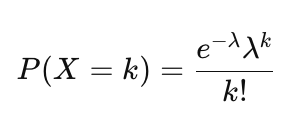
* λ는 단위 시간(또는 단위 공간)당 평균 발생 횟수이고, k는 특정 시간(또는 공간) 동안의 이벤트 발생 횟수입니다.

In [86]:
import math
print("1.", (int((math.e**(-3)) * (3**5) / math.factorial(5) * 100)), "%")

x = 0
for i in range(2):
    p = (math.e**(-3)) * (3**i) / math.factorial(i)
    x += p
print("2.", (int((1-x)*100)), "%")

1. 10 %
2. 80 %


In [87]:
l = 3
# 1
print(spst.poisson.pmf(5, l))

# 2
print(1- spst.poisson.cdf(1, l))

0.10081881344492458
0.8008517265285442


## 12. 독립성 검정
* 성별과 시험합격은 독립적인가를 검정하시오!
    - 1 검정 통계량?
    - 2 p-value?
    - 3 귀무가설 기준 (기각/채택)?
    - 4 남자의 합격 기대 빈도?

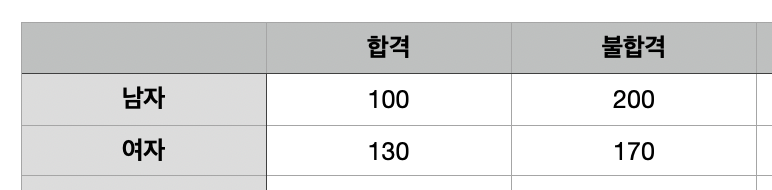

In [97]:
result = spst.chi2_contingency([[100, 200], [130, 170]])
print("1.", result[0])
print("2.", result[1])
print("3. 귀무가설 기각")
print("4.", result[3][0][0])

1. 5.929494712103407
2. 0.01488951060599475
3. 귀무가설 기각
4. 115.0


## 13. 베르누이분포와 이항분포
* 1. [베르누이 분포] 다음 데이터는 100번의 시도에서 각각 성공(1) 또는 실패(0)를 나타냅니다.  
이 데이터를 바탕으로 각 시도의 성공 확률을 계산하시오.
* 2. [이항분포] 1번 문제에서 계산한 성공 확률을 사용하여, 100번의 시도 중 정확히 60번 성공할 확률을 계산하시오.

In [100]:
data = pd.read_csv('./kaggle_data/t3_success.csv')
data.head()

,Success
0,1
1,0
2,0
3,1
4,1


In [117]:
# 1
prob = data['Success'].sum() / len(data)
print(prob)

# 2
print(spst.binom.pmf(60, 100, prob))

0.62
0.07464985555860273


## 14. 점추정 및 구간추정
* 데이터셋은 어떤 도시의 일일 평균 온도 입니다.
<br>
    - 1. 점추정: 데이터셋을 기반으로 이 도시의 평균 연간 온도를 점추정하세요. (반올림하여 소수 둘째자리까지)
    - 2. 구간추정: 95% 신뢰수준에서 이 도시의 평균 연간 온도에 대한 신뢰구간을 구하세요. (반올림하여 소수 둘째자리까지)

In [119]:
data = pd.read_csv('./kaggle_data/daily_temperatures.csv')
data.head()

,Daily Average Temperature
0,28.820262
1,22.000786
2,24.893690
3,31.204466
4,29.337790


In [130]:
# 1
mu = data['Daily Average Temperature'].mean()
print(round(mu, 2))

# 2
std = data['Daily Average Temperature'].std()
# inter = 1.96 * std / (len(data) ** 0.5)
# print(round(mu-inter, 2), round(mu+inter, 2)) #spst.norm.interval(0.95, loc=mu, scale=(std/(len(data) ** 0.5)))
x, y = spst.t.interval(0.95, df=len(data)-1, loc=mu, scale=(std/(len(data) ** 0.5)))
print(round(x, 2), round(y, 2))

19.94
19.43 20.45


## 15. 이원 분산 분석
* 크리스마스 장식 종류와 지역에 따라 판매량에 유의미한 차이가 있는지 이원 분산 분석을 통해 검정하세요.
    - 1. 크리스마스 장식 종류(트리, 조명, 장식품)가 판매량에 미치는 영향을 분석하세요.  
    이때, 장식 종류의 F-value, p-value를 구하시오.
    - 2. 지역(북부, 남부, 동부, 서부)이 판매량에 미치는 영향을 분석하세요.  
    이때, 장식 종류의 F-value, p-value를 구하시오
    - 3. 크리스마스 장식 종류와 지역의 상호작용이 판매량에 미치는 영향을 분석하세요.  
    이때, 장식 종류의 F-value, p-value를 구하시오.

In [131]:
data = pd.read_csv('./kaggle_data/christmas_decoration_sales.csv')
data.head()

,Decoration_Type,Region,Sales
0,트리,북부,64
1,트리,남부,67
2,트리,동부,84
3,트리,서부,87
4,트리,북부,87


In [150]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'Sales ~ C(Decoration_Type) * C(Region)'
model = ols(formula, data=data).fit()
anova = anova_lm(model)
display(anova)

# 1
print(anova[['F', 'PR(>F)']].loc['C(Decoration_Type)'].tolist())

# 2
print(anova[['F', 'PR(>F)']].loc['C(Region)'].tolist())

# 3
print(anova[['F', 'PR(>F)']].loc['C(Decoration_Type):C(Region)'].tolist())

,df,sum_sq,mean_sq,F,PR(>F)
C(Decoration_Type),2.0,1764.500000,882.250000,2.370578,0.114943
C(Region),3.0,804.305556,268.101852,0.720381,0.549614
C(Decoration_Type):C(Region),6.0,5153.944444,858.990741,2.308081,0.066915
Residual,24.0,8932.000000,372.166667,NaN,NaN


[2.370577698163901, 0.11494344960639084]
[0.7203811514156353, 0.5496135553740116]
[2.3080808080808106, 0.06691452600857864]
